In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_keff_h5(file):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    init_param = db.root.initial_depcode_siminfo
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    depstep = [x['depletion_timestep'] for x in init_param.iterrows()][0]
    db.close()
    day = depstep*np.arange(len(k_0))
    return day, k_0, k_1, k_0_e, k_1_e, depstep

In [2]:
#db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
db_file = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_10950d_jeff.h5'
#db_file_7_5 = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu_geo_swch/7_5d_840_steps.h5'
days, k_bds, k_eds, k_bds_err, k_eds_err, dep_step = read_keff_h5(db_file)
#days_7_5, k_bds_7_5, k_eds_7_5, k_bds_err_7_5, k_eds_err_7_5, dep_step_7_5 = read_keff_h5(db_file_7_5)

days2 = np.linspace(dep_step, (len(k_eds))*(dep_step), num=len(k_eds), endpoint=True)
#print(dep_step, days, days2)
#print(k_bds, k_eds)

<IPython.core.display.Javascript object>


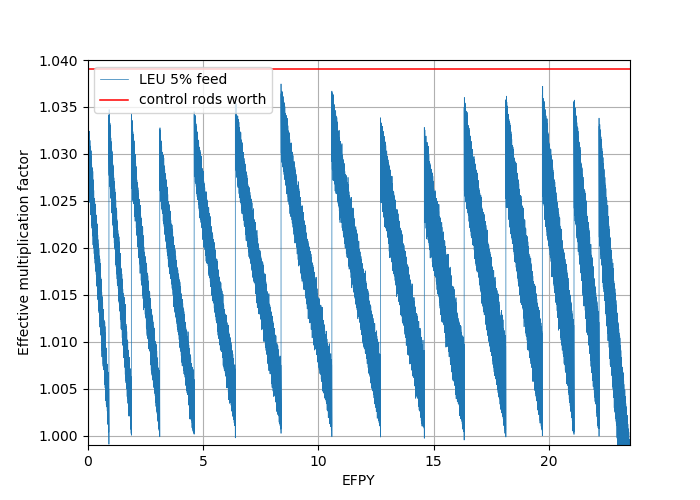

In [55]:
#print(len(k_bds), len(k_bds_7_5[:641]))
keff = merge(k_bds, k_eds)
#keff_7_5 = merge(k_bds_7_5[:641], k_eds_7_5[:641])
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)

# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd/365, keff, '-', label='LEU 5% feed', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd/365.0, keff_7_5, '-', label='7.5d', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)

#ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.axhline(y=1.039, linewidth=1.1, color='r', label='control rods worth')
#ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([0.75, 1.018])

ax.set_xlim(0,23.5)
ax.set_ylim(0.999, 1.04)
# zoomed 1
#ax.set_xlim(2200, 2373)
#ax.set_ylim(.999, 1.04)

#ax.legend(loc=0)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/keff_3.png',bbox_inches='tight', dpi=900)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/job-apps/nlabs/pres/ornl-online-repr/images/keff_tap_var_geo.png',bbox_inches='tight', dpi=900)
#print(keff[-700:-620])

In [12]:
indx = []
for i in range(len(keff)):
    if keff[i]-keff[i-1] > 0.03:
        indx.append(efpd[i])
        print(i, keff[i], efpd[i], (keff[i]-keff[i-1])*1e5)
print(indx)
print("Months between moderator rods re-configurations ", (np.diff(indx)/30))
print("Average months between moderator rods re-configurations ", (np.mean(np.diff(indx)/30)))

0 1.0366100072860718 0.0 18631.20198249817
226 1.03410005569458 339.0 3501.802682876587
462 1.0338200330734253 693.0 3377.997875213623
762 1.0325700044631958 1143.0 3269.2015171051025
1124 1.034500002861023 1686.0 3435.0037574768066
1558 1.0353399515151978 2337.0 3558.093309402466
2040 1.0374499559402466 3060.0 3720.998764038086
2576 1.0366899967193604 3864.0 3681.302070617676
3088 1.0338499546051025 4632.0 3400.397300720215
3550 1.0328199863433838 5325.0 3310.4002475738525
3970 1.0349600315093994 5955.0 3543.3053970336914
4410 1.035770058631897 6615.0 3591.907024383545
4794 1.0362800359725952 7191.0 3629.404306411743
5128 1.0355600118637085 7692.0 3542.9954528808594
5392 1.033810019493103 8088.0 3388.500213623047
[0.0, 339.0, 693.0, 1143.0, 1686.0, 2337.0, 3060.0, 3864.0, 4632.0, 5325.0, 5955.0, 6615.0, 7191.0, 7692.0, 8088.0]
Months between moderator rods re-configurations  [11.3 11.8 15.  18.1 21.7 24.1 26.8 25.6 23.1 21.  22.  19.2 16.7 13.2]
Average months between moderator rods r